<a href="https://colab.research.google.com/github/gabrielalins-stack/programacao-estatistica/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Exercício: Simulação de Normal via Aceitação–Rejeição

Implemente o método de aceitação–rejeição para gerar variáveis aleatórias segundo os seguintes passos:

**a)** Gere uma variável $Y \sim \text{Exponencial}(1)$ e use-a como proposta para simular o valor absoluto de uma normal padrão $|Z| \sim \text{HalfNormal}(0,1)$.  

**b)** A partir da variável da letra (a), use uma Bernoulli(1/2) para atribuir o sinal aleatoriamente e obter uma normal padrão $Z \sim \mathcal{N}(0,1)$.  

**c)** Transforme o resultado da letra (b) em uma normal geral $X \sim \mathcal{N}(\mu,\sigma^2)$ por meio de transformação afim.  

Gere uma amostra com $N = 10^6$ observações e compare os histogramas com a versão do NumPy (`np.random.normal`).  


(array([1.63190e+05, 1.56886e+05, 1.44270e+05, 1.26348e+05, 1.06706e+05,
        8.65410e+04, 6.70330e+04, 4.99010e+04, 3.58700e+04, 2.42160e+04,
        1.57700e+04, 9.96400e+03, 5.95700e+03, 3.50500e+03, 1.84300e+03,
        1.04700e+03, 4.97000e+02, 2.46000e+02, 1.17000e+02, 5.60000e+01,
        1.60000e+01, 1.10000e+01, 7.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([5.19221691e-07, 2.06224407e-01, 4.12448295e-01, 6.18672182e-01,
        8.24896070e-01, 1.03111996e+00, 1.23734385e+00, 1.44356773e+00,
        1.64979162e+00, 1.85601551e+00, 2.06223940e+00, 2.26846328e+00,
        2.47468717e+00, 2.68091106e+00, 2.88713495e+00, 3.09335883e+00,
        3.29958272e+00, 3.50580661e+00, 3.71203050e+00, 3.91825439e+00,
        4.12447827e+00, 4.33070216e+00, 4.53692605e+00, 4.74314994e+00,
        4.94937382e+00, 5.15559771e+00]),
 <BarContainer object of 25 artists>)

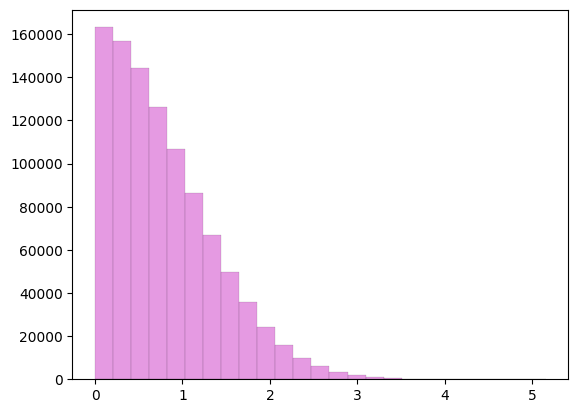

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def exponencial(lam):
  u = np.random.uniform(low= 0, high= 1)
  x = (-1)*np.log(u)/(lam)
  return x

def normal_aceitacao_rejeicao():
  y = exponencial(1)
  u = np.random.uniform()
  while u > np.exp((-(y-1)**2)/2):
    y = exponencial(1)
    u = np.random.uniform()
  if u < np.exp((-(y-1)**2)/2):
    return y

a = [normal_aceitacao_rejeicao() for i in range(1000000)]

plt.hist(a, color = 'orchid', alpha = 0.7, bins=25, edgecolor = 'black', linewidth = 0.1)

(array([8.00000e+00, 2.00000e+01, 9.00000e+01, 2.75000e+02, 7.86000e+02,
        2.16100e+03, 5.30900e+03, 1.13780e+04, 2.17080e+04, 3.86310e+04,
        6.05530e+04, 8.61760e+04, 1.09752e+05, 1.26119e+05, 1.30191e+05,
        1.20028e+05, 1.00208e+05, 7.50220e+04, 5.03340e+04, 3.06150e+04,
        1.65940e+04, 8.22900e+03, 3.62700e+03, 1.47700e+03, 4.79000e+02,
        1.69000e+02, 4.00000e+01, 1.20000e+01, 7.00000e+00, 2.00000e+00]),
 array([-4.67801392, -4.3504561 , -4.02289828, -3.69534046, -3.36778263,
        -3.04022481, -2.71266699, -2.38510917, -2.05755135, -1.72999352,
        -1.4024357 , -1.07487788, -0.74732006, -0.41976224, -0.09220441,
         0.23535341,  0.56291123,  0.89046905,  1.21802687,  1.5455847 ,
         1.87314252,  2.20070034,  2.52825816,  2.85581598,  3.18337381,
         3.51093163,  3.83848945,  4.16604727,  4.49360509,  4.82116292,
         5.14872074]),
 <BarContainer object of 30 artists>)

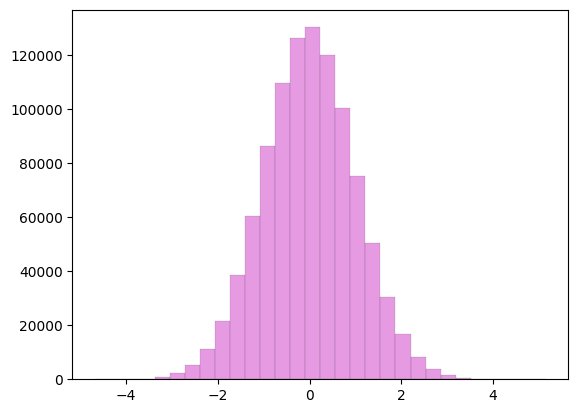

In [ ]:
def bernoulli(p):
  u = np.random.uniform(low= 0, high= 1)
  if u <= p:
    return 1
  else:
    return 0

def normal_padrao():
  sinal = bernoulli(1/2)
  y = normal_aceitacao_rejeicao()
  if sinal == 1:
    return y
  else:
    return -y

b = [normal_padrao() for i in range(1000000)]

plt.hist(b, color = 'orchid', alpha = 0.7, bins=30, edgecolor = 'black', linewidth = 0.1)

(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        3.0000e+00, 5.0000e+00, 4.0000e+00, 1.2000e+01, 1.1000e+01,
        1.9000e+01, 2.8000e+01, 3.7000e+01, 6.2000e+01, 8.3000e+01,
        1.3700e+02, 1.5900e+02, 2.6200e+02, 3.1600e+02, 4.4000e+02,
        5.6200e+02, 8.0800e+02, 1.0460e+03, 1.2650e+03, 1.6340e+03,
        2.1260e+03, 2.7230e+03, 3.4220e+03, 4.1710e+03, 5.1660e+03,
        6.2120e+03, 7.4650e+03, 8.9050e+03, 1.0449e+04, 1.2512e+04,
        1.4362e+04, 1.6212e+04, 1.8619e+04, 2.0995e+04, 2.3393e+04,
        2.5619e+04, 2.7821e+04, 3.0211e+04, 3.2143e+04, 3.3894e+04,
        3.5903e+04, 3.7426e+04, 3.8172e+04, 3.8766e+04, 3.9082e+04,
        3.9011e+04, 3.8827e+04, 3.8032e+04, 3.7147e+04, 3.5919e+04,
        3.3978e+04, 3.1803e+04, 2.9815e+04, 2.7422e+04, 2.5264e+04,
        2.2845e+04, 2.0570e+04, 1.8153e+04, 1.6170e+04, 1.3984e+04,
        1.2146e+04, 1.0327e+04, 8.7860e+03, 7.3270e+03, 6.0950e+03,
        5.0440e+03, 3.9340e+03, 3.3410e+03, 2.63

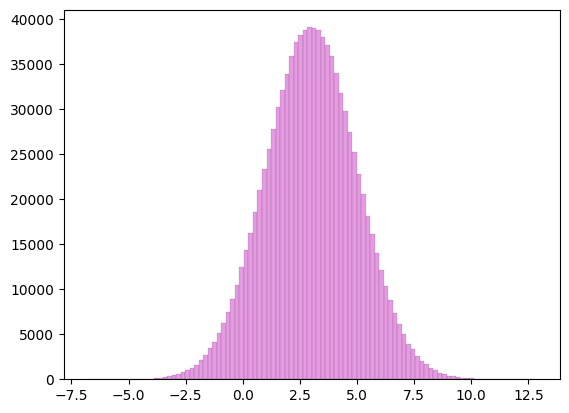

In [ ]:
def transf_afim(l, e):
  z = normal_padrao()
  x = l + ((e**0.5)*z)
  return x

c = [transf_afim(3,4) for i in range(1000000)]

plt.hist(c, color = 'orchid', alpha = 0.7, bins=100, edgecolor = 'black', linewidth = 0.1)

(array([1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        4.0000e+00, 3.0000e+00, 5.0000e+00, 8.0000e+00, 1.8000e+01,
        2.4000e+01, 3.5000e+01, 5.4000e+01, 7.2000e+01, 7.5000e+01,
        1.3400e+02, 1.8200e+02, 2.6500e+02, 3.5900e+02, 4.2200e+02,
        6.1400e+02, 7.7500e+02, 1.0540e+03, 1.4060e+03, 1.7290e+03,
        2.1660e+03, 2.6870e+03, 3.4340e+03, 4.0910e+03, 5.1240e+03,
        5.9810e+03, 7.4290e+03, 8.8550e+03, 1.0675e+04, 1.2162e+04,
        1.3892e+04, 1.6045e+04, 1.8297e+04, 2.0182e+04, 2.2664e+04,
        2.4606e+04, 2.6934e+04, 2.9491e+04, 3.1223e+04, 3.3528e+04,
        3.5111e+04, 3.6367e+04, 3.7629e+04, 3.8268e+04, 3.8639e+04,
        3.8730e+04, 3.8537e+04, 3.8006e+04, 3.6778e+04, 3.5776e+04,
        3.4132e+04, 3.2147e+04, 2.9965e+04, 2.8160e+04, 2.5242e+04,
        2.3538e+04, 2.1048e+04, 1.9083e+04, 1.6810e+04, 1.4735e+04,
        1.2744e+04, 1.1069e+04, 9.3420e+03, 7.8970e+03, 6.7050e+03,
        5.4230e+03, 4.4700e+03, 3.7490e+03, 2.93

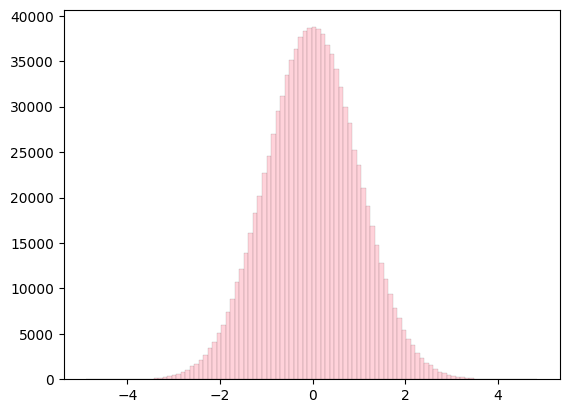

In [ ]:
d = np.random.normal(0,1, size=1000000)

plt.hist(d, color = 'pink', alpha = 0.7, bins=100, edgecolor = 'black', linewidth = 0.1)

## Exercício 2: Amostragem por Rejeição

Considere a distribuição
$$
f(x) = \tfrac{1}{2}\,\sin(x), \quad x \in [0,\pi].
$$

Use o método de aceitação–rejeição para gerar amostras dessa distribuição.

- Escolha uma proposta $g(x)$ adequada.  
- Encontre e exiba a constante $c$ tal que $c > \max_x \tfrac{f(x)}{g(x)}$.  
- Implemente o algoritmo para gerar amostras de $f(x)$.  
- Calcule o número médio de tentativas necessárias até aceitar um ponto.  
- Compare esse valor com a eficiência teórica esperada dada por $1/c$.  


(array([ 17.,  27.,  40.,  54.,  76.,  73.,  89., 102., 100., 125., 154.,
        151., 159., 179., 167., 181., 197., 203., 225., 233., 223., 247.,
        201., 247., 246., 250., 255., 280., 242., 278., 230., 278., 255.,
        255., 223., 273., 241., 242., 250., 232., 213., 225., 195., 185.,
        195., 166., 167., 181., 155., 145., 121.,  96.,  83.,  92.,  78.,
         68.,  62.,  32.,  25.,  16.]),
 array([0.02368278, 0.07536178, 0.12704078, 0.17871978, 0.23039878,
        0.28207778, 0.33375678, 0.38543578, 0.43711479, 0.48879379,
        0.54047279, 0.59215179, 0.64383079, 0.69550979, 0.74718879,
        0.79886779, 0.8505468 , 0.9022258 , 0.9539048 , 1.0055838 ,
        1.0572628 , 1.1089418 , 1.1606208 , 1.2122998 , 1.26397881,
        1.31565781, 1.36733681, 1.41901581, 1.47069481, 1.52237381,
        1.57405281, 1.62573181, 1.67741082, 1.72908982, 1.78076882,
        1.83244782, 1.88412682, 1.93580582, 1.98748482, 2.03916382,
        2.09084283, 2.14252183, 2.19420083, 2.

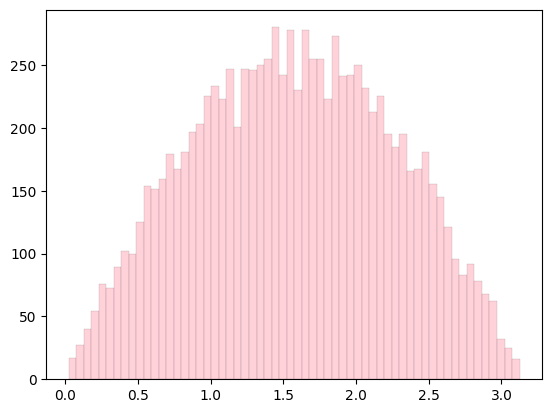

In [ ]:
def rejeicao():
  c = np.pi/2

  contador = 0

  while u > np.sin(y):
    contador += 1
    y = np.random.uniform(low= 0, high= np.pi)
    u = np.random.uniform()

  if u < np.sin(y):
    return y, contador

amostra = []
media_tentativas = []
for i in range (10000):
  a = rejeicao()[0]
  b = rejeicao()[1]
  amostra.append(a)
  media_tentativas.append(b)

plt.hist(amostra, color = 'pink', alpha = 0.7, bins=60, edgecolor = 'black', linewidth = 0.1)

In [ ]:
print(np.mean(media_tentativas))

1.5617


In [ ]:
print(np.pi/2)

1.5707963267948966
